<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/58/Uber_logo_2018.svg/1024px-Uber_logo_2018.svg.png" alt="UBER LOGO" width="50%" />

# UBER Pickups 

## Company's Description 📇

<a href="http://uber.com/" target="_blank">Uber</a> is one of the most famous startup in the world. It started as a ride-sharing application for people who couldn't afford a taxi. Now, Uber expanded its activities to Food Delivery with <a href="https://www.ubereats.com/fr-en" target="_blank">Uber Eats</a>, package delivery, freight transportation and even urban transportation with <a href="https://www.uber.com/fr/en/ride/uber-bike/" target="_blank"> Jump Bike</a> and <a href="https://www.li.me/" target="_blank"> Lime </a> that the company funded. 


The company's goal is to revolutionize transportation accross the globe. It operates now on about 70 countries and 900 cities and generates over $14 billion revenue! 😮


## Project 🚧

One of the main pain point that Uber's team found is that sometimes drivers are not around when users need them. For example, a user might be in San Francisco's Financial District whereas Uber drivers are looking for customers in Castro.  

(If you are not familiar with the bay area, check out <a href="https://www.google.com/maps/place/San+Francisco,+CA,+USA/@37.7515389,-122.4567213,13.43z/data=!4m5!3m4!1s0x80859a6d00690021:0x4a501367f076adff!8m2!3d37.7749295!4d-122.4194155" target="_blank">Google Maps</a>)

Eventhough both neighborhood are not that far away, users would still have to wait 10 to 15 minutes before being picked-up, which is too long. Uber's research shows that users accept to wait 5-7 minutes, otherwise they would cancel their ride. 

Therefore, Uber's data team would like to work on a project where **their app would recommend hot-zones in major cities to be in at any given time of day.**  

## Goals 🎯

Uber already has data about pickups in major cities. Your objective is to create algorithms that will determine where are the hot-zones that drivers should be in. Therefore you will:

* Create an algorithm to find hot zones 
* Visualize results on a nice dashboard 

## Scope of this project 🖼️

To start off, Uber wants to try this feature in New York city. Therefore you will only focus on this city. Data can be found here: 

👉👉<a href="https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+non+Supervis%C3%A9/Projects/uber-trip-data.zip" target="_blank"> Uber Trip Data</a> 👈👈

**You only need to focus on New York City for this project**

## Helpers 🦮

To help you achieve this project, here are a few tips that should help you: 

### Clustering is your friend 

Clustering technics are a perfect fit for the job. Think about it, all the pickup locations can be gathered into different clusters. You can then use **cluster coordinates to pin hot zones** 😉
    

### Create maps with `plotly` 

Check out <a href="https://plotly.com/" target="_blank">Plotly</a> documentation, you can create maps and populate them easily. Obviously, there are other libraries but this one should do the job pretty well. 


### Start small grow big 

Eventhough Uber wants to have hot-zones per hour and per day of week, you should first **start small**. Pick one day at a given hour and **then start to generalize** your approach. 

## Deliverable 📬

To complete this project, your team should: 

* Have a map with hot-zones using any python library (`plotly` or anything else). 
* You should **at least** describe hot-zones per day of week. 
* Compare results with **at least** two unsupervised algorithms like KMeans and DBScan. 

Your maps should look something like this: 

<img src="https://full-stack-assets.s3.eu-west-3.amazonaws.com/images/Clusters_uber_pickups.png" alt="Uber Cluster Map" />

## Code

In [1]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go

import plotly.express as px

In [2]:
!ls sample_data

anscombe.json		      mnist_test.csv	     taxi-zone-lookup.csv
california_housing_test.csv   mnist_train_small.csv  uber-raw-data-apr14.csv
california_housing_train.csv  README.md


In [3]:
zones = pd.read_csv('./sample_data/taxi-zone-lookup.csv')

In [4]:
zones.sample(5)

,LocationID,Borough,Zone
85,86,Queens,Far Rockaway
37,38,Queens,Cambria Heights
102,103,Manhattan,Governor's Island/Ellis Island/Liberty Island
68,69,Bronx,East Concourse/Concourse Village
191,192,Queens,Queensboro Hill


### EDA Zones

In [5]:
zones['Borough'].value_counts()

Manhattan        69
Queens           69
Brooklyn         61
Bronx            43
Staten Island    20
Unknown           2
EWR               1
Name: Borough, dtype: int64

In [6]:
nb_zones = zones['Borough'].value_counts().count()
print(f'There are {nb_zones} neighborhoods')

There are 7 neighborhoods


In [7]:
april = pd.read_csv('./sample_data/uber-raw-data-apr14.csv')

In [8]:
april

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
91320,4/11/2014 19:47:00,40.7722,-73.9558,B02598
91321,4/11/2014 19:48:00,40.7551,-74.0025,B02598
91322,4/11/2014 19:48:00,40.7224,-73.9874,B02598
91323,4/11/2014 19:48:00,40.7627,-74.0008,B02598


In [9]:
april.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91325 entries, 0 to 91324
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date/Time  91325 non-null  object 
 1   Lat        91325 non-null  float64
 2   Lon        91325 non-null  float64
 3   Base       91325 non-null  object 
dtypes: float64(2), object(2)
memory usage: 2.8+ MB


In [10]:
april.Base.value_counts()

B02598    55789
B02512    35536
Name: Base, dtype: int64

In [11]:
april.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

### Create new features from the datetime

In [12]:
april['date'] = pd.to_datetime(april['Date/Time'])
april['day'] = april['date'].dt.day
april['time_hour'] = april['date'].dt.hour
april['time_mins'] = april['date'].dt.minute
april['dayofweek'] = april['date'].dt.dayofweek
april['dayname'] = april['date'].dt.day_name()
april.head(5)

,Date/Time,Lat,Lon,Base,date,day,time_hour,time_mins,dayofweek,dayname
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,2014-04-01 00:11:00,1,0,11,1,Tuesday
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,2014-04-01 00:17:00,1,0,17,1,Tuesday
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,2014-04-01 00:21:00,1,0,21,1,Tuesday
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,2014-04-01 00:28:00,1,0,28,1,Tuesday
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,2014-04-01 00:33:00,1,0,33,1,Tuesday


In [13]:
print(f'Number of pickups per day')
total_pickups = april.shape[0]
pd.DataFrame({'pickups':april['dayname'].value_counts().sort_values(ascending=False),
              '% pickups':april['dayname'].value_counts().sort_values(ascending=False) * 100 / total_pickups})

Number of pickups per day


,pickups,% pickups
Friday,17252,18.890775
Thursday,17053,18.672872
Wednesday,16282,17.828634
Tuesday,14390,15.756912
Saturday,10173,11.139338
Monday,9281,10.162606
Sunday,6894,7.548864


### Plot pickups distribution

In [14]:
weekend_days = ['Friday','Saturday', 'Sunday']
weekends = april[april['dayname'].isin(weekend_days)]
workdays = april[~april['dayname'].isin(weekend_days)]

In [15]:
def plot_distribution_day(data, title="Distribution during the day"):
    plt.figure(figsize=(8, 6))
    sns.displot(data=data, x='time_hour', hue='dayname', kind='kde' )
    plt.title(title)
    plt.show()

<Figure size 576x432 with 0 Axes>

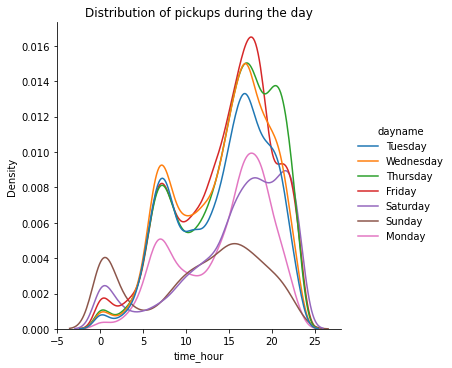

In [16]:
plot_distribution_day(april, title="Distribution of pickups during the day")


> Top 3 days with more pickups: Wednesday, Tuesday, Thursday/Friday

> Day with the least pickups: Sunday

> Pick hours:
- Around 5pm
- Around 7am
- Around midnight


#### Plot Sunday pickups at 0, 7h and 17h

In [17]:
pickups = april[(april['dayname'] == 'Sunday') & (april['time_hour'].isin([0, 7, 17])) ]

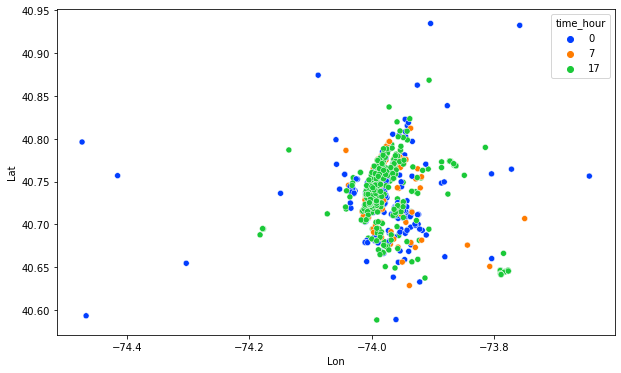

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Lon', y='Lat', data=pickups, hue='time_hour',palette='bright')
#plt.axis('off')
#plt.legend()
plt.show()

In [19]:
fig = px.scatter_mapbox(pickups, lat="Lat", lon="Lon", color='time_hour', zoom=8, mapbox_style="carto-positron")
fig.update_layout(autosize=False, width=800, height=500)
fig.show()


## K-Means

### Clustering on Wednesday data

In [20]:
from sklearn.cluster import KMeans

In [21]:
pickups = april[april['dayname'] == 'Wednesday']
X=pickups[['Lat', 'Lon']]

In [22]:
# Baseline: Choose 7 clusters for the 7 neighborhoods 
kmeans =  KMeans(n_clusters= 7, init = "k-means++", random_state = 0)
kmeans.fit(X)
X_clusters = X.copy()
X_clusters['cluster'] = kmeans.predict(X)

#### Cluster centers

In [23]:
kmeans.cluster_centers_

array([[ 40.76463311, -73.97459385],
       [ 40.65896384, -73.77437119],
       [ 40.73074181, -73.99959785],
       [ 41.02898485, -73.68943636],
       [ 40.79399214, -73.88539643],
       [ 40.68955214, -73.96782323],
       [ 40.69560055, -74.22296319]])

#### Plot in map

In [24]:

def plot_map(X, cluster_column, cluster_centers=None, title='Hot zones'):
    '''
    X: dataframe with Lat et Lon features
    cluster_column: Name of the column containing the cluster
    cluster_centers: Centers of clusters
    '''
    fig = px.scatter_mapbox(X, lat="Lat", lon="Lon", color=cluster_column, zoom=8, mapbox_style="carto-positron", title=title)
    if cluster_centers is not None:
        fig.add_trace(go.Scattermapbox(
            lat=cluster_centers[:,0],
            lon=cluster_centers[:, 1],
            mode='markers',
            marker=go.scattermapbox.Marker(
                size=12,
                color='rgb(255, 0, 0)',
                opacity=0.7
            ),
            hoverinfo='none',
            showlegend=False,
        ))
    fig.update_layout(autosize=False, width=850, height=500)

    fig.show()

In [25]:
plot_map(X_clusters, 'cluster', cluster_centers=kmeans.cluster_centers_)

#### Train with different number of clusters

In [26]:
def train_kmeans(X, k_init=1, k_end=12):
    wcss =  []
    k = []
    for i in range (k_init,k_end): 
        kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        k.append(i)
        print("WCSS for K={} --> {}".format(i, wcss[-1]))
    return wcss

In [27]:
wcss = train_kmeans(X)

WCSS for K=1 --> 64.048644385858
WCSS for K=2 --> 42.73716798650219
WCSS for K=3 --> 32.015521753573395
WCSS for K=4 --> 23.469010986331753
WCSS for K=5 --> 18.18121868503961
WCSS for K=6 --> 15.333221714634854
WCSS for K=7 --> 12.705232183359094
WCSS for K=8 --> 10.870990024352212
WCSS for K=9 --> 9.443509194508184
WCSS for K=10 --> 8.36867167108688
WCSS for K=11 --> 7.5894094797348055


In [28]:
# Let's visualize using plotly
#k=11
# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(range(1, 12))

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Wednesday: Inertia per cluster"
)


> It seems that the "ideal" number of clusters for Wednesday is between 5 and 6

In [29]:
def kmeans_fit_predict(X, n_clusters):
    kmeans =  KMeans(n_clusters= n_clusters, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    X_clusters = X.copy()
    X_clusters['cluster'] = kmeans.predict(X)
    return X_clusters, kmeans.cluster_centers_

In [30]:
print(f'Testing with 5 clusters')
#kmeans =  KMeans(n_clusters= 5, init = "k-means++", random_state = 0)
#kmeans.fit(X)
#X_clusters['cluster'] = kmeans.predict(X)
X_clusters, cluster_centers = kmeans_fit_predict(X, 5)
X_clusters['cluster'].value_counts()

Testing with 5 clusters


0    8048
1    7156
3     524
2     372
4     182
Name: cluster, dtype: int64

In [31]:
cluster_centers

array([[ 40.76385616, -73.97517087],
       [ 40.72267539, -73.99495984],
       [ 40.659825  , -73.77937742],
       [ 40.81129427, -73.86839962],
       [ 40.69560055, -74.22296319]])

Wednesday: 5 clusters

In [32]:
plot_map(X_clusters, 'cluster', cluster_centers)

Wednesday: 6 clusters

In [33]:
X_clusters, cluster_centers = kmeans_fit_predict(X, 6)
plot_map(X_clusters, 'cluster', cluster_centers)

### Calculate number of clusters (zones) per day

In [34]:
def calculate_elbow_points(X):
    '''
    Calculates elbow points of a dataframe
    '''
    wcss =  []
    k = []
    for i in range (1,11): 
        kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        k.append(i)
        print("WCSS for K={} --> {}".format(i, wcss[-1]))
    return wcss, k    

In [35]:
#from sklearn.metrics import silhouette_score
#silhouette_score(X, kmeans.labels_)

In [36]:
def draw_elbow(wcss, k, day):
    '''
    Parameters:
    -----------------
    wcss: array, list of inertia values
    k:array, list of integer numbers representing the cluster numbers
    day: day of the week 
    '''
    # Create DataFrame
    wcss_frame = pd.DataFrame(wcss)
    k_frame = pd.Series(k)

    # Create figure
    fig= px.line(
        wcss_frame,
        x=k_frame,
        y=wcss_frame.iloc[:,-1]
    )

    # Create title and axis labels
    fig.update_layout(
        yaxis_title="Inertia",
        xaxis_title="# Clusters",
        title=f"Inertia per cluster={day}"
    )

    # Render
    fig.show() #renderer="notebook"
   # fig.show(renderer="iframe") # if using workspace

#### Elbow per day

In [37]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
coords = ['Lat', 'Lon']

In [38]:
for i, day in enumerate(days):
    wcss, k = calculate_elbow_points(april[april['dayname'] == day].loc[:, coords])
    draw_elbow(wcss, k, day)

WCSS for K=1 --> 37.019135594889846
WCSS for K=2 --> 22.82472243272678
WCSS for K=3 --> 16.861596468469713
WCSS for K=4 --> 12.470957869051539
WCSS for K=5 --> 9.51183811405636
WCSS for K=6 --> 7.057097719638533
WCSS for K=7 --> 6.223380027339895
WCSS for K=8 --> 5.596963334245048
WCSS for K=9 --> 5.035634383836274
WCSS for K=10 --> 4.565762676628692


WCSS for K=1 --> 40.63033396508787
WCSS for K=2 --> 24.332308672750322
WCSS for K=3 --> 18.51654717721923
WCSS for K=4 --> 13.53540548732591
WCSS for K=5 --> 9.924223839765165
WCSS for K=6 --> 8.166175808331207
WCSS for K=7 --> 6.687711824874855
WCSS for K=8 --> 5.881251904855624
WCSS for K=9 --> 5.2036125422087025
WCSS for K=10 --> 4.606305955959445


WCSS for K=1 --> 57.34604133905559
WCSS for K=2 --> 36.63100351376831
WCSS for K=3 --> 27.552638547485856
WCSS for K=4 --> 20.13252092028402
WCSS for K=5 --> 15.123516922611323
WCSS for K=6 --> 12.581662884118035
WCSS for K=7 --> 10.682837576219404
WCSS for K=8 --> 9.326901420047562
WCSS for K=9 --> 8.142029823102662
WCSS for K=10 --> 7.416987720587653


WCSS for K=1 --> 64.048644385858
WCSS for K=2 --> 42.73716798650219
WCSS for K=3 --> 32.015521753573395
WCSS for K=4 --> 23.469010986331753
WCSS for K=5 --> 18.18121868503961
WCSS for K=6 --> 15.333221714634854
WCSS for K=7 --> 12.705232183359094
WCSS for K=8 --> 10.870990024352212
WCSS for K=9 --> 9.443509194508184
WCSS for K=10 --> 8.36867167108688


WCSS for K=1 --> 64.52963520871403
WCSS for K=2 --> 41.347368613960626
WCSS for K=3 --> 31.337563741946873
WCSS for K=4 --> 22.878092744650736
WCSS for K=5 --> 17.45743143512213
WCSS for K=6 --> 14.416192571881963
WCSS for K=7 --> 11.687420247159762
WCSS for K=8 --> 10.146981703864036
WCSS for K=9 --> 9.004021604413087
WCSS for K=10 --> 8.026648461597748


WCSS for K=1 --> 60.11188928021212
WCSS for K=2 --> 40.07751158819299
WCSS for K=3 --> 29.79251953000717
WCSS for K=4 --> 22.851381376641704
WCSS for K=5 --> 18.355405920107295
WCSS for K=6 --> 14.851083291391998
WCSS for K=7 --> 12.138578031173244
WCSS for K=8 --> 10.649700150474597
WCSS for K=9 --> 9.305770562713011
WCSS for K=10 --> 8.531307379574685


WCSS for K=1 --> 41.600654046668566
WCSS for K=2 --> 29.205231061714013
WCSS for K=3 --> 22.471109644803477
WCSS for K=4 --> 17.70086253338992
WCSS for K=5 --> 13.91862415335514
WCSS for K=6 --> 11.0118799398033
WCSS for K=7 --> 9.310056261034898
WCSS for K=8 --> 8.476157045152664
WCSS for K=9 --> 7.776534094275008
WCSS for K=10 --> 7.076250152974584


> Saturday, Thursday, Saturday: 4 clusters

> Thursday: 5 clusters

> Wednesday: 6 clusters

### DBScan

In [39]:
from sklearn.cluster import DBSCAN

In [40]:
def fit_predict(data, days):
    coords = ['Lat', 'Lon']
    for i, d in enumerate(days):
        X = data.loc[data["dayname"]==d,coords]
        dbscan = DBSCAN(eps=0.015, min_samples=50)
        # Predict clusters on sample data
        X.loc[:,'cluster'] = dbscan.fit_predict(X)
        print('Cluster, number of pickups')
        print(X.cluster.value_counts())
        plot_map(X, 'cluster', title=f'Hot zones {d}')


In [41]:
days = ['Sunday', 'Monday', 'Tuesday']
fit_predict(april, days)

Cluster, number of pickups
 0    5819
-1     354
 4     218
 2     212
 1     171
 3      91
 5      29
Name: cluster, dtype: int64


Cluster, number of pickups
 0    8233
-1     382
 3     267
 2     233
 1      90
 4      76
Name: cluster, dtype: int64


Cluster, number of pickups
 0    13143
-1      529
 3      340
 1      247
 2      131
Name: cluster, dtype: int64


In [42]:
days = ['Wednesday', 'Thursday', 'Friday', 'Saturday']
fit_predict(april, days)


Cluster, number of pickups
 0    15040
-1      541
 3      304
 1      286
 2      111
Name: cluster, dtype: int64


Cluster, number of pickups
 0    15529
-1      516
 3      432
 4      295
 1      146
 2      135
Name: cluster, dtype: int64


Cluster, number of pickups
 0    16121
-1      519
 2      260
 3      246
 1      106
Name: cluster, dtype: int64


Cluster, number of pickups
 0    9561
-1     455
 1      94
 2      63
Name: cluster, dtype: int64


> Conclusion: Depending on the day, the clusters found by DBSCAN are different.  It is more suited to use DBSCAN than Kmeans because like that we can capture different pickup densities, thus different formes.

> Something to explore:  
- Different distances per Day of group of days
- Minimum samples to consider a cluster
- Check the clusters per hour